# Gaussian Mixture Model

Gaussian mixture model is a clustering algorithm. As the name suggests, it is just a bunch of gaussions stack together. So we use EM algorithms which is similar to kmeans.

In [77]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [78]:
u1_true = 5
s1_true = 5
u2_true = 30
s2_true = 4

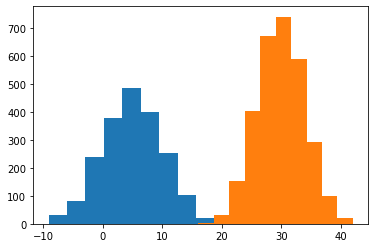

In [79]:
g1 = np.random.normal(u1_true, s1_true, 2000)
plt.hist(g1)

g2 = np.random.normal(u2_true, s2_true, 3000)
plt.hist(g2)

plt.show()

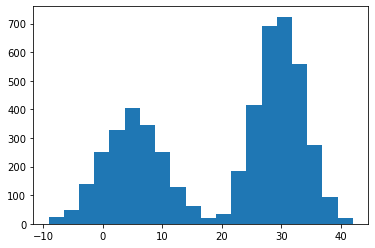

In [80]:
mix = np.array([*g1, *g2]) 
plt.hist(mix, bins=20)
plt.show()

# The GMM



## Initialize

In [95]:
u1 = -10
s1 = 3

u2 = 10
s2 = 3

loop = 0

In [96]:
def plot_gmm():
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))
    ax1.hist(mix, bins=20)

    x = np.linspace(u1_true - 3 * s1_true, u1_true + 3 * s1_true, 1000)
    y = norm.pdf(x, 5, 5)
    plt.plot(x, y)

    x = np.linspace(u2_true - 3 * s2_true, u2_true + 3 * s2_true, 1000)
    y = norm.pdf(x, 30, 5)
    plt.plot(x, y)

    x = np.linspace(u1-3*s1, u1+3*s1 ,1000)
    y = norm.pdf(x, u1, s1)
    plt.plot(x, y)

    x = np.linspace(u2-3*s2, u2+3*s2 ,1000)
    y = norm.pdf(x, u2, s2)
    plt.plot(x, y)
    
    ax1.set_title("Original Data")
    plt.xlim(-20, 45)
    
    plt.title(f"Gaussian mixture model (Loop {loop})")
    
    plt.savefig(f"temp/{loop}.png")

FileNotFoundError: [Errno 2] No such file or directory: 'temp/0.png'

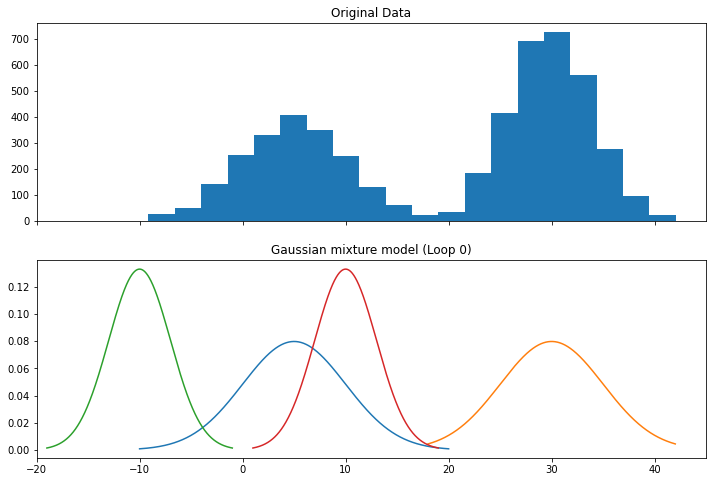

In [97]:
plot_gmm()

# Estimate

In the estimation step, the probability of a point belongs to a distribution is calculated by the probability density function. But that should be normalized. just like softmax. like the following example.

In [ ]:
def estimate_example():
    plt.figure(figsize=(10, 5))

    u1 = 5
    s1 = 5
    u2 = 21
    s2 = 9

    x1 = np.linspace(u1-3*s1, u1+3*s1 ,1000)
    y1 = norm.pdf(x1, u1, s1)
    plt.plot(x1, y1)

    x2 = np.linspace(u2-3*s2, u2+3*s2 ,1000)
    y2 = norm.pdf(x2, u2, s2)
    plt.plot(x2, y2)

    x3 = 9
    y3_1 = norm.pdf(9, u1, s1)
    y3_2 = norm.pdf(9, u2, s2)

    plt.plot([x3, x3], [0, y3_1])
    plt.plot([x3, x3], [0, y3_2])

    ax1.set_title("Original Data")

    plt.title(f"Gaussian mixture model (Loop {loop})")

    plt.show()
    
estimate_example()

In [98]:
y3_1, y3_2

(0.05793831055229655, 0.01822334163066596)

In [99]:
denominator = y3_1+y3_2
y3_1/denominator, y3_2/denominator

(0.7607281209329838, 0.23927187906701627)

the probability of x_3 belongs to the blue distribution is 0.058 and the yellow 0.018. After normalization it becomes 0.76 and 0.24. So x_3 is 76% blue and 24% yellow. In Gaussian Mixture Model, it is called responsibility. But I will call them weights.

# Maximize

In the maximization step, the weights are used to calculate $\mu$ and $\sigma$ of the gaussians. It is just simply weighted mean of them.

# EM

In [100]:
def estimate(mix, mu1, sigma1, mu2, sigma2):
    pdf1 = norm.pdf(mix, mu1, sigma1)
    pdf2 = norm.pdf(mix, mu2, sigma2)
    pdf_sum = pdf1 + pdf2
    w1=pdf1/pdf_sum
    w2=pdf2/pdf_sum
    return w1, w2

def maximize(mix, w1, w2):
    mu1=np.average(mix, weights=w1)
    sigma1_squared=np.average((mix-mu1)**2, weights=w1)
    sigma1=np.sqrt(sigma1_squared)
    sigma1
    
    mu2=np.average(mix, weights=w2)
    sigma2_squared=np.average((mix-mu2)**2, weights=w2)
    sigma2=np.sqrt(sigma2_squared)
    sigma2
    
    return mu1, sigma1, mu2, sigma2

FileNotFoundError: [Errno 2] No such file or directory: 'temp/1.png'

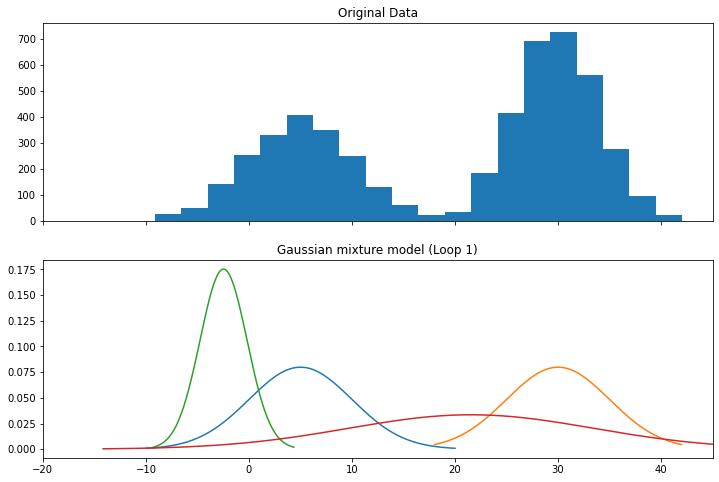

In [101]:
w1, w2 = estimate(mix, u1, s1, u2, s2)
u1, s1, u2, s2 = maximize(mix, w1, w2)
loop+=1
plot_gmm()

In [ ]:
w1, w2 = estimate(mix, u1, s1, u2, s2)
u1, s1, u2, s2 = maximize(mix, w1, w2)
loop+=1
plot_gmm()

FileNotFoundError: [Errno 2] No such file or directory: 'temp/2.png'

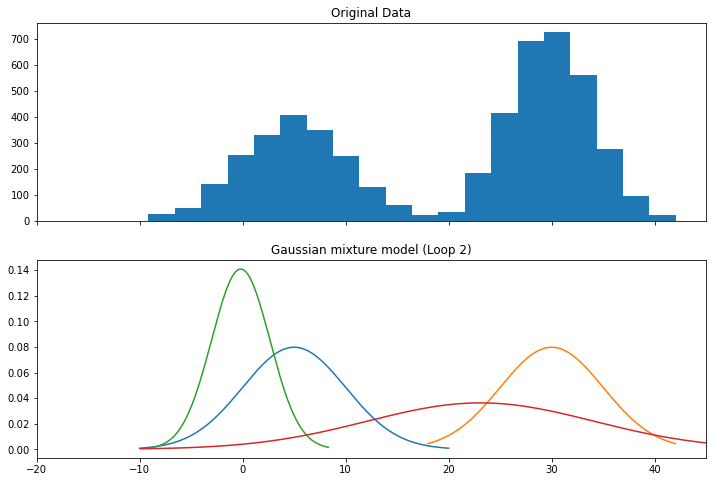

In [102]:
w1, w2 = estimate(mix, u1, s1, u2, s2)
u1, s1, u2, s2 = maximize(mix, w1, w2)
loop+=1
plot_gmm()

In [ ]:
w1, w2 = estimate(mix, u1, s1, u2, s2)
u1, s1, u2, s2 = maximize(mix, w1, w2)
loop+=1
plot_gmm()

FileNotFoundError: [Errno 2] No such file or directory: 'temp/3.png'

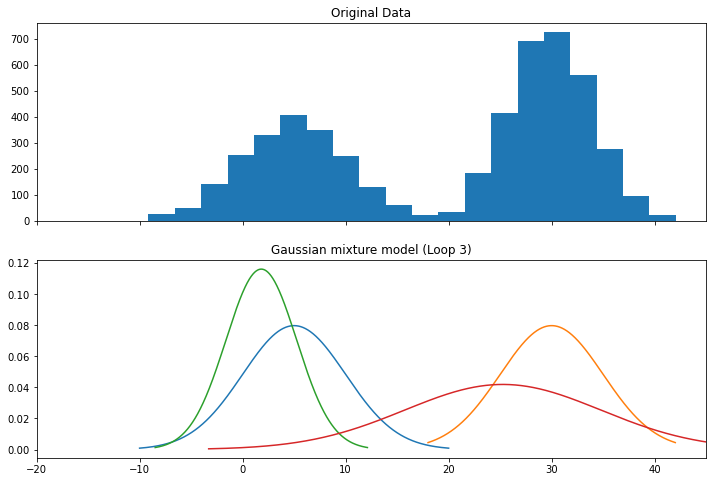

In [103]:
w1, w2 = estimate(mix, u1, s1, u2, s2)
u1, s1, u2, s2 = maximize(mix, w1, w2)
loop+=1
plot_gmm()

In [ ]:
u1, s1, u2, s2

In [ ]:
w1, w2 = estimate(mix, u1, s1, u2, s2)
u1, s1, u2, s2 = maximize(mix, w1, w2)
loop+=1
plot_gmm()

In [ ]:
w1, w2 = estimate(mix, u1, s1, u2, s2)
u1, s1, u2, s2 = maximize(mix, w1, w2)
loop+=1
plot_gmm()

In [ ]:
w1, w2 = estimate(mix, u1, s1, u2, s2)
u1, s1, u2, s2 = maximize(mix, w1, w2)
loop+=1
plot_gmm()

In [ ]:
u1, s1, u2, s2

In [ ]:
w1>0.5

In [ ]:
y_hat = w1>0.5

In [ ]:
y = np.array([True] * 2000 + [False] * 3000) 

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y, y_hat)